# Vlasov Dispersion Relation Without Landau Damping (Maxwellian Distribution)

In [1]:
import numpy as np
from prettytable import PrettyTable
import os
import matplotlib.pyplot as plt
import plasmapy.mathematics
import scipy.signal
import scipy.optimize as op
%config InlineBackend.figure_format = 'svg'

In [3]:
k = 0.1
L = 2*np.pi/k
tem = 1  # 温度

vmax = 5. # 速度最大值
q = 1.0
v_th = np.sqrt(2*tem)
# 等离子体参量
dens = 1
l_D = np.sqrt( tem / dens / q**2 ) # $\lambda_D^2$
w_pe = np.sqrt( dens * q**2 )
print('k*l_D = ',k*l_D)
print('w_pe  = ',w_pe)

k*l_D =  0.1
w_pe  =  1.0


In [164]:
def VlasovPDR(w,k):
    zeta = w / k /v_th
    r = 1 + 1 / k**2 / l_D**2 * ( 1 + zeta*plasmapy.mathematics.plasma_dispersion_func(zeta).real )
    return r

def LandauPDR(w,k):
    wr,wi=w
    wc=complex(wr,wi)
    zeta = wc / k /v_th
    r = 1 + 1 / k**2 / l_D**2 * ( 1 + zeta*plasmapy.mathematics.plasma_dispersion_func(zeta) )
    return [r.real,r.imag]

In [169]:
def SolveVlasovPDR(k,w_init,k_init):
    s=op.root(lambda w:VlasovPDR(w,k),[w_init,k_init])
    if s.success == True:
        r = s
    return r

def SolveLandauPDR(k,w_init,k_init):
    s=op.root(lambda w:LandauPDR(w,k),[w_init,k_init])
    if s.success == True:
        r = s
    return r

In [170]:
w_up_list = np.array([])
w_down_list = np.array([])
k_list = np.linspace(0.1,0.52,num=40)
print('k = ',k_list)

k =  [0.1        0.11076923 0.12153846 0.13230769 0.14307692 0.15384615
 0.16461538 0.17538462 0.18615385 0.19692308 0.20769231 0.21846154
 0.22923077 0.24       0.25076923 0.26153846 0.27230769 0.28307692
 0.29384615 0.30461538 0.31538462 0.32615385 0.33692308 0.34769231
 0.35846154 0.36923077 0.38       0.39076923 0.40153846 0.41230769
 0.42307692 0.43384615 0.44461538 0.45538462 0.46615385 0.47692308
 0.48769231 0.49846154 0.50923077 0.52      ]


In [174]:
print(SolveVlasovPDR(0.4,1.15,0.3))
print(SolveLandauPDR(0.4,0.624,-3))

    fjac: array([[-0.99999843, -0.0017742 ],
       [ 0.0017742 , -0.99999843]])
     fun: array([-2.22044605e-15,  6.66133815e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-6.34394668e-11, -6.57166462e-12])
       r: array([-2.11294789, -1.24356919,  7.5849494 ])
  status: 1
 success: True
       x: array([1.25596428, 0.62414406])
    fjac: array([[ 0.84736133,  0.53101673],
       [-0.53101673,  0.84736133]])
     fun: array([1.32856837e-10, 1.40887996e-10])
 message: 'The solution converged.'
    nfev: 81
     qtf: array([1.31721314e-08, 3.39841252e-09])
       r: array([36.75069814, 16.611094  ,  2.43843916])
  status: 1
 success: True
       x: array([ 1.46076554, -0.87913291])


In [150]:
k_last = 1
w_down_last = 0.1
for k in k_list:
    w_up = SolveVlasovPDR(k,1.0,0.1).x
    w_down = SolveVlasovPDR(k,w_down_last,k_last).x
    w_up.sort()
    w_down.sort()
    w_up_list = np.append(w_up_list,w_up[1])
    w_down_list = np.append(w_down_list,w_down[0])
    k_last = k
    w_down_last = w_down[0]

In [151]:
print(w_up_list)
print(w_down_list)

[1.01519753 1.01870594 1.0226004  1.0268906  1.03158824 1.0367077
 1.0422671  1.04829022 1.05480885 1.06186366 1.06950091 1.07776307
 1.08667583 1.09623615 1.10640661 1.11711723 1.12827295 1.13976321
 1.15147079 1.16327839 1.17507272 1.18674639 1.1981983  1.20933287
 1.22005876 1.23028695 1.23992867 1.24889283 1.25708306 1.26439405
 1.27070674 1.2758819  1.27975075 1.28210075 1.28265264 1.28102055
 0.85913111 1.26858795 1.25520671 0.99561967]
[0.13201131 0.14656299 0.16121915 0.17599084 0.19088938 0.20592641
 0.22111392 0.23646428 0.25199034 0.26770544 0.28362349 0.29975906
 0.31612743 0.33274474 0.34962805 0.36679551 0.3842665  0.40206181
 0.42020386 0.43871698 0.45762768 0.47696509 0.49676139 0.51705239
 0.53787832 0.55928471 0.58132363 0.6040553  0.62755021 0.65189206
 0.67718186 0.70354389 0.73113452 0.76015606 0.79087938 0.82368353
 0.85913111 0.89812986 0.94234495 0.99561967]


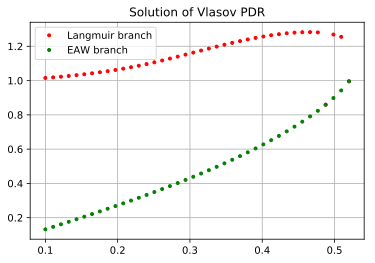

In [156]:
plt.plot(k_list,w_up_list,'.',color='r',label='Langmuir branch')
plt.plot(k_list,w_down_list,'.',color='g',label='EAW branch')
plt.legend()
plt.title(r'Solution of Vlasov PDR')
plt.grid()
plt.show()

In [162]:
def eq(w):
    r = 1/(w**2-0.1)+1/(w**2-0.2)
    return r

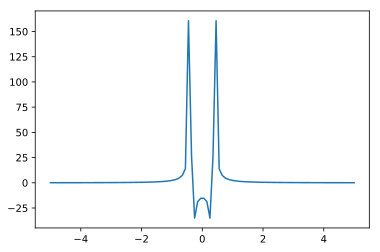

In [163]:
w = np.linspace(-5,5,num=100)
plt.plot(w,eq(w))
plt.show()